In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# 1 - Loading Data

In [2]:
X_path = (
    "https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/refs/heads/master"
    "/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_X_Train.csv"
)

y_path = (
    "https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/refs/heads/master/"
    "3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_Y_Train.csv"
)

-0.03779466168006854 0.9920801322508517


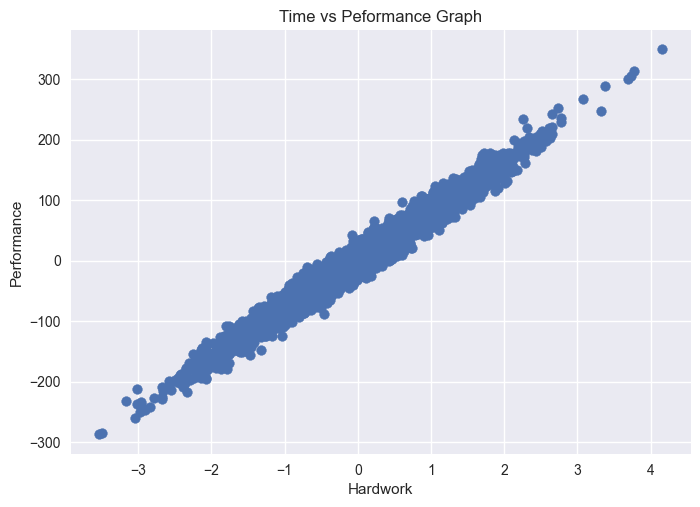

In [3]:
# Loading the data
X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

# Converting X, y to array numpy
X = X.values
y = y.values

# Normalization
u = X.mean()
std = X.std()
X = (X-u)/std

print(u, std)

# Visualizing the data
plt.style.use('seaborn-v0_8')
plt.title("Time vs Peformance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.scatter(X, y)
plt.show()

In [4]:
X.shape, y.shape

((3750, 1), (3750, 1))

# Linear Regression

In [58]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x

    return y_

def gradient(X, Y, theta):
    m = X.shape[0]

    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y).item()
        grad[1] += ((y_ - y) * x).item()

    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):

    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]

        #storing datas
        theta_list.append((theta[0], theta[1]))
        error_list.append(error(X,Y,theta)[0])
        
    return theta,error_list,theta_list
    

In [61]:
theta, error_list, theta_list = gradientDescent(X,y)

In [62]:
theta

array([ 0.6838508 , 79.90361453])

In [63]:
theta_list

[(0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293191729063332,

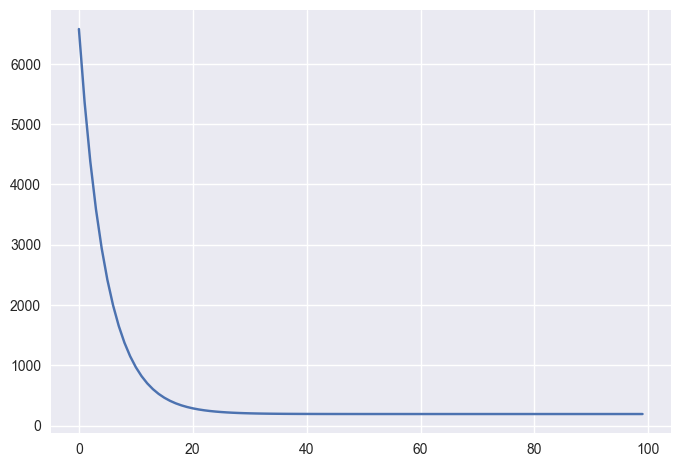

In [8]:
plt.plot(error_list)

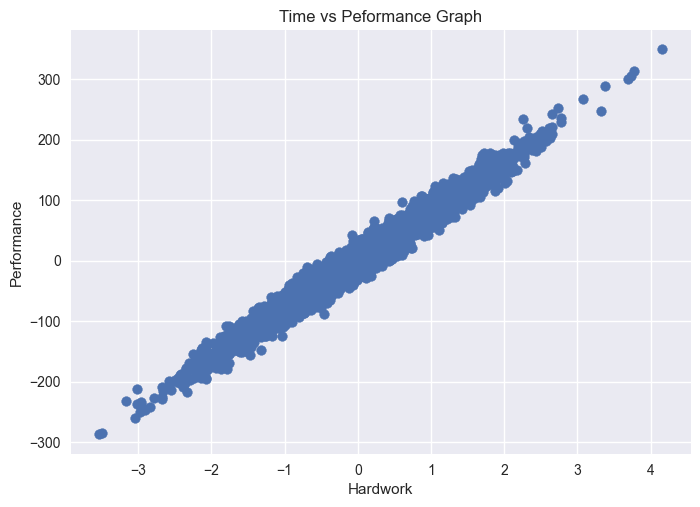

In [9]:
plt.style.use('seaborn-v0_8')
plt.title("Time vs Peformance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.scatter(X, y)
plt.show()

In [10]:
print("Find theta:", theta)

Find theta: [ 0.6838508  79.90361453]


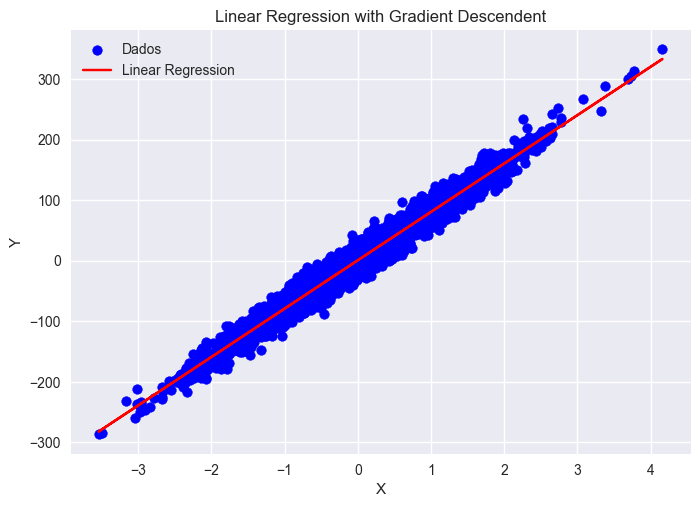

In [11]:
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, hypothesis(X, theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descendent')
plt.legend()
plt.show()

# r2_score

In [12]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y_.mean())**2)
    score = (1-num/denom)

    return score*100

In [13]:
y_ = hypothesis(X, theta)
r2_score(y,y_)

97.09612226971657

# Surface plots

In [30]:
#a = np.array([1,2,3])
#b = np.array([4,5,6,7])

a = np.arange(-1, 1, 0.02)
b = a

#print(a)

a,b = np.meshgrid(a,b)

#print(a)
#print(b)

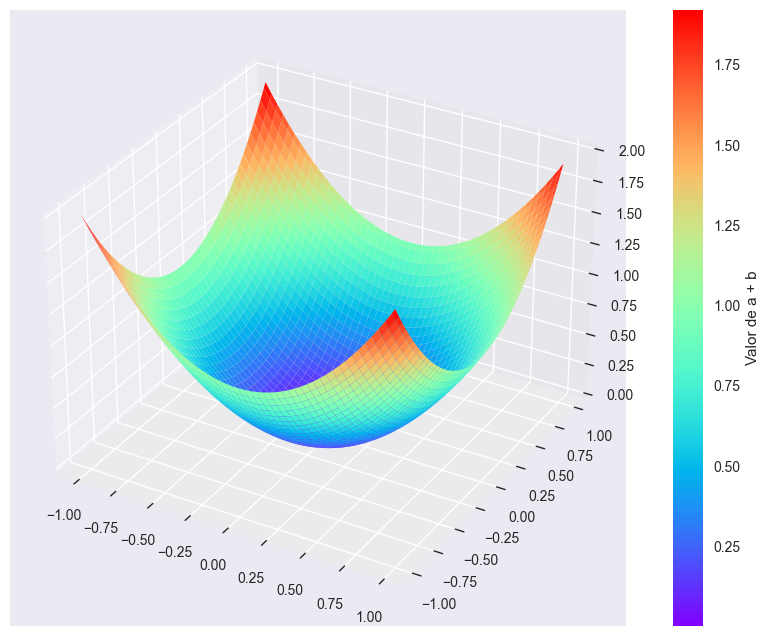

In [41]:
fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(111, projection='3d')
surface = axes.plot_surface(a,b,a**2+b**2, cmap='rainbow')
fig.colorbar(surface, ax=axes, label='Valor de a + b')
plt.show()

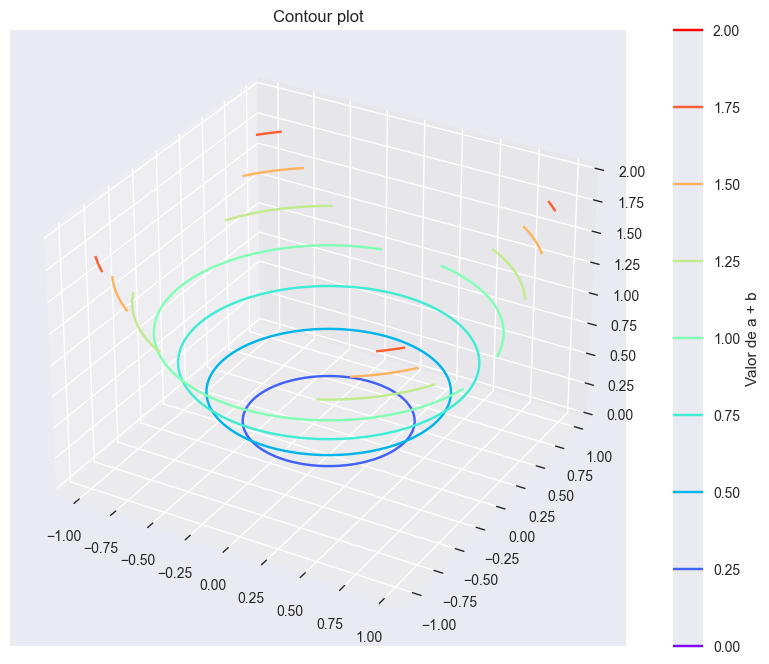

In [39]:
fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(111, projection='3d')
surface = axes.contour(a,b,a**2+b**2, cmap='rainbow')
fig.colorbar(surface, ax=axes, label='Valor de a + b')
axes.set_title('Contour plot')
plt.show()

# Visualization of loss function, gradient descent and Theta updates

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [45]:
theta

array([ 0.6838508 , 79.90361453])

In [87]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i, j] = np.sum((y - y_)**2)/y.shape[0]

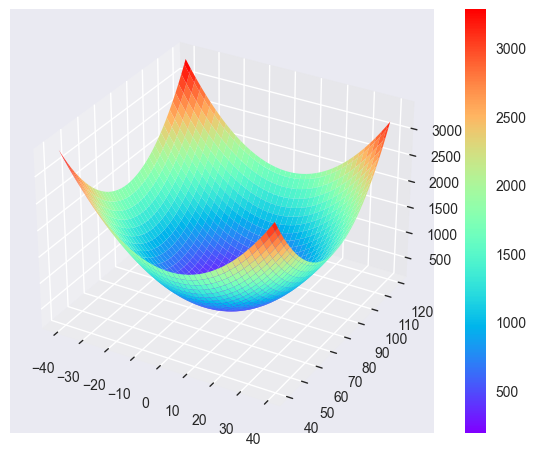

In [88]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
surface = axes.plot_surface(T0,T1,J, cmap='rainbow')
fig.colorbar(surface, ax=axes, label='')
plt.show()

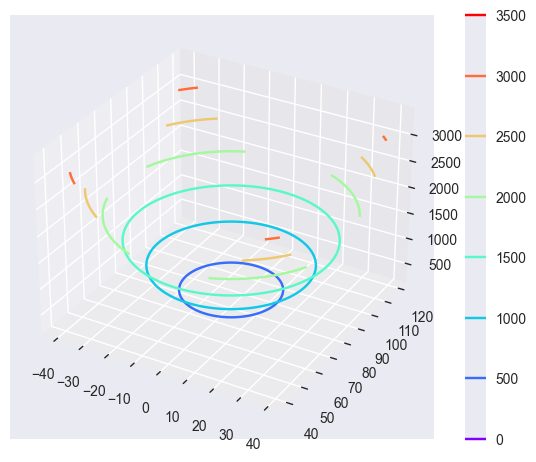

In [89]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
surface = axes.contour(T0,T1,J, cmap='rainbow')
fig.colorbar(surface, ax=axes, label='')
plt.show()

# Plot the changes in values of theta

In [90]:
theta_list = np.array(theta_list)

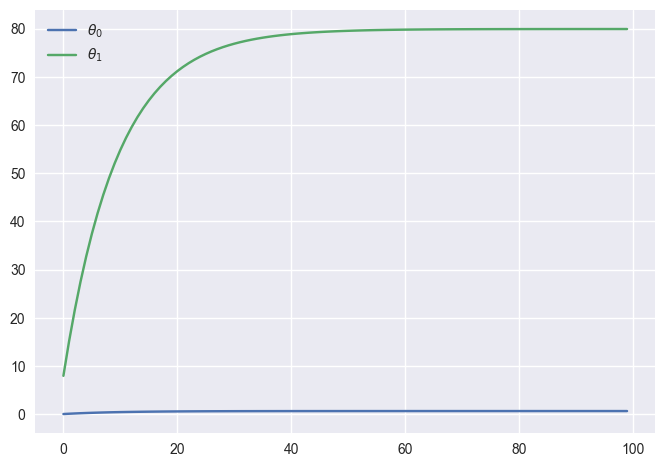

In [91]:
plt.plot(theta_list[:,0],label=r'${\theta_0}$')
plt.plot(theta_list[:,1],label=r'${\theta_1}$')
plt.legend()
plt.show()

# Trajectory Theta

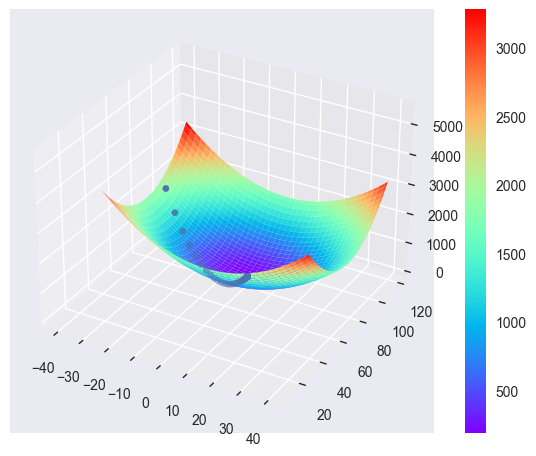

In [92]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
surface = axes.plot_surface(T0,T1,J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
fig.colorbar(surface, ax=axes, label='')
plt.show()

# 2D Countour Plot

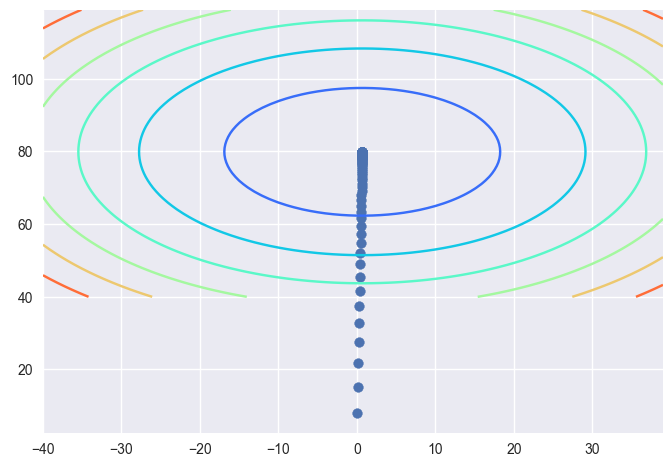

In [97]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()